In [56]:
!pip install gillespy2 
!pip install drawnow
import sklearn
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import gillespy2
from gillespy2.solvers.numpy.ode_solver import ODESolver
from gillespy2.solvers.numpy.tau_leaping_solver import TauLeapingSolver
from gillespy2.solvers.numpy.tau_hybrid_solver import TauHybridSolver
from gillespy2.solvers.numpy.ssa_solver import NumPySSASolver


In [58]:
omega_array = [-2.5, 1.25, 2.5, 5]
max_nonspecific_array = [1, 2, 3]
mutation_rate_array = [1, 2]
combination_therapy = True
counter = 1
for x in range(len(omega_array)):
  for y in range(len(max_nonspecific_array)):
    for z in range(len(mutation_rate_array)):
      if mutation_rate_array[z] == 1:
        combination_therapy = False
      else:
        combination_therapy = True
      max_nonspecific = max_nonspecific_array[y]
      max_specific =5
      omega=omega_array[x]
      rmax=2.1 #0.73
      CARRYING_CAPACITY =8E+10 # 8E8cells/mL * 100 mL
      specific_mutation_rate = (4E-7)**z
      nonspecific_mutation_rate = 4E-7
      base=0.64

      species_matrix = np.zeros((max_nonspecific+1, max_specific+1))

      for i in range(max_nonspecific+1):
        for j in range(max_specific+1):
          species_matrix[i][j] = CARRYING_CAPACITY * ((nonspecific_mutation_rate ** i) * (specific_mutation_rate ** j))
      print(np.round(species_matrix))


[[8.0e+10 8.0e+10 8.0e+10 8.0e+10 8.0e+10 8.0e+10]
 [3.2e+04 3.2e+04 3.2e+04 3.2e+04 3.2e+04 3.2e+04]]
[[8.0e+10 3.2e+04 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [3.2e+04 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]]
[[8.0e+10 8.0e+10 8.0e+10 8.0e+10 8.0e+10 8.0e+10]
 [3.2e+04 3.2e+04 3.2e+04 3.2e+04 3.2e+04 3.2e+04]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]]
[[8.0e+10 3.2e+04 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [3.2e+04 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]]
[[8.0e+10 8.0e+10 8.0e+10 8.0e+10 8.0e+10 8.0e+10]
 [3.2e+04 3.2e+04 3.2e+04 3.2e+04 3.2e+04 3.2e+04]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]]
[[8.0e+10 3.2e+04 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [3.2e+04 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]]
[[8.0e+10 8.0e+10 8.0e+10 8.0e+10 8.0e+10 8.0e+10]
 [3.2e+04 3.2e+04 3.2e+04

In [59]:
      def growthrate_antisense(rmax, entry, i, j, omega):
        rspecific = growthrate_specific(j, omega)
        return rmax/(1+((rmax-rspecific)/rspecific)*((entry-i)/entry))
        
      def growthrate_specific(j, omega):
          if j >= 0 and j <= max_specific:
              if omega >= 1:
                  r = rmax - (rmax-base)*((max_specific-j)/max_specific)**omega
              elif omega < -1:
                  r = base + (rmax-base)*(j/max_specific)**(-omega)
              return r
          else:
              return 0
      arr = np.zeros((max_nonspecific+1, max_specific+1))
      names = np.zeros((max_nonspecific+1, max_specific+1), dtype=object)

      for i in range(max_nonspecific+1):
        for j in range(max_specific+1):
          arr[i][j] = growthrate_antisense(rmax, max_nonspecific, i, j, omega)
          names[i][j] = 'NS_' + str(i) + 'S_' + str(j)

      print(arr)


      arr_raveled = np.ravel(arr)
      names_raveled = np.ravel(names)

[[0.64       1.6215872  1.9864704  2.0850496  2.0995328  2.1       ]
 [0.83305785 1.75484778 2.02292466 2.09000936 2.09968851 2.1       ]
 [1.19289941 1.91197191 2.06074189 2.09499277 2.09984424 2.1       ]
 [2.1        2.1        2.1        2.1        2.1        2.1       ]]


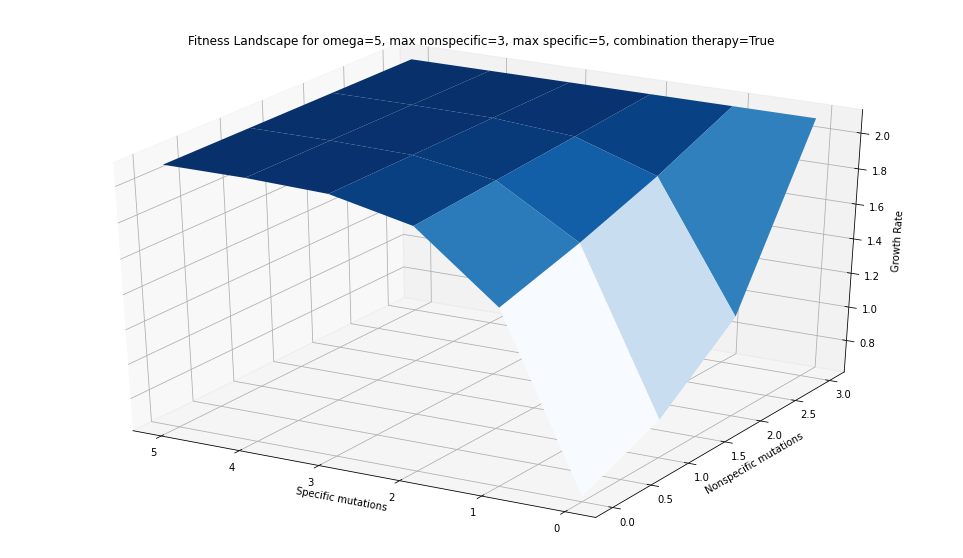

In [60]:
      import numpy as np
      from mpl_toolkits.mplot3d import Axes3D  
      # Axes3D import has side effects, it enables using projection='3d' in add_subplot
      import matplotlib.pyplot as plt
      import random

      fig = plt.figure()
      ax = fig.add_subplot(111, projection='3d')

      y = np.arange(0, arr.shape[0], 1)
      x = np.arange(0, arr.shape[1], 1)

      X, Y = np.meshgrid(x, y)

      ax.plot_surface(X, Y, arr, cmap='Blues')

      ax.set_xlabel('Specific mutations')
      ax.set_ylabel('Nonspecific mutations')
      ax.set_zlabel('Growth Rate')

      plt.gca().invert_xaxis()
      fig.set_size_inches(17, 10)
      plt.title('Fitness Landscape for omega=' + str(omega) + ', max nonspecific='+ str(max_nonspecific)+', max specific=' + str(max_specific) + ', combination therapy=' + str(combination_therapy))
      plt.savefig('graph'+str(counter)+'.png')
      counter += 1

In [64]:
class BacterialModel(gillespy2.Model):
          def __init__(self, species_init):
              # First call the gillespy2.Model initializer.
              gillespy2.Model.__init__(self, name='BacterialModel')

              Bsum = "("
              for name in names_raveled:
                Bsum += 'B'+ name +'+'
              Bsum = Bsum[:-1]
              Bsum += ')'

              # Define parameters for the rates of creation and dissociation.
              parameters = []
              for i in range(len(arr_raveled)):
                parameters.append(gillespy2.Parameter(name='P'+names_raveled[i], expression=arr_raveled[i]))
              parameters.append(gillespy2.Parameter(name='cc', expression=CARRYING_CAPACITY))#1000000))#8*10**11))
              parameters.append(gillespy2.Parameter(name='specificmutationrate', expression = specific_mutation_rate))#5*10**-5))
              parameters.append(gillespy2.Parameter(name='nonspecificmutationrate', expression = nonspecific_mutation_rate))#5*10**-5))
              self.add_parameter(parameters)

              # Define variables for the molecular species representing M and D.
              ecoli = []

              for i in range(max_nonspecific+1):
                for j in range(max_specific+1):
                  ecoli.append(gillespy2.Species(name='B'+names[i][j], initial_value=species_init[i][j], mode='continuous'))

              self.add_species(ecoli)

            #  self.add_species(gillespy2.Species(name='Error_Code', initial_value=0, mode='continuous'))
              # The list of reactants and products for a Reaction object are each a
              # Python dictionary in which the dictionary keys are Species objects
              # and the values are stoichiometries of the species in the reaction.
              duplicate = []
              propensity_growth = []
              for i in range(len(arr_raveled)):

                propensity_fun = 'P'+names_raveled[i] + '/cc *' + 'B'+names_raveled[i] + ' * (cc-' + Bsum + ') * (1 - specificmutationrate - nonspecificmutationrate) ' +  '*' + '(B'+names_raveled[i]+' >= 1)'
                propensity_growth.append(propensity_fun)
                # Matt: Found the issue: ecoli[i]:0
                duplicate.append(gillespy2.Reaction(name="R"+names_raveled[i], propensity_function=propensity_fun, reactants={}, products={ecoli[i]:1}))    

            #  self.add_reaction(duplicate)

              mutations = np.zeros((max_nonspecific+1, max_specific+1), dtype=object)
              propensity_mutations = []
              counter = 0
              for i in range(max_nonspecific+1):
                for j in range(max_specific+1):
                  output_nonspecific = '(' + '(P'+names[i][j] + '/cc *' + 'B'+names[i][j] + ' * (cc-' + Bsum + '))' + '* nonspecificmutationrate * -1' + ')'#'- B' + names[i][j] + '* nonspecificmutationrate'  
                  output_specific = '(' +'(P'+names[i][j] + '/cc *' + 'B'+names[i][j] + ' * (cc-' + Bsum + '))' + '* specificmutationrate * -1'  + ')'#'- B' + names[i][j] + '* specificmutationrate'
                  input_nonspecific = '(' +'(P'+names[i-1][j] + '/cc *' + 'B'+names[i-1][j] + ' * (cc-' + Bsum + '))' + '* nonspecificmutationrate'  + ')'#'+ B' + names[i-1][j] + '* nonspecificmutationrate'
                  input_specific = '(' +'(P'+names[i][j-1] + '/cc *' + 'B'+names[i][j-1] + ' * (cc-' + Bsum + '))' + '* specificmutationrate' + ')'#'+ B' + names[i][j-1] + '* specificmutationrate'

                  overall_propensity_fun = [input_nonspecific, input_specific, output_nonspecific, output_specific]

                  if i == 0:
                    overall_propensity_fun.remove(input_nonspecific)
                  if j == 0:
                    overall_propensity_fun.remove(input_specific)
                  if i == max_nonspecific:
                    overall_propensity_fun.remove(output_nonspecific)
                  if i == max_specific:
                    overall_propensity_fun.remove(output_specific)
                
                  propensity_fun = "+".join(overall_propensity_fun)

                  mutations[i][j] = gillespy2.Reaction(name="M"+names[i][j], propensity_function=propensity_fun, reactants={}, products={ecoli[counter]:1})
                  counter += 1
                  propensity_mutations.append(propensity_fun)
            # mutations = np.ravel(mutations).tolist()
            # self.add_reaction(mutations)

              avg_growthrate = ''
              for i in range(max_nonspecific+1):
                for j in range(max_specific+1):
                  this_population = 'B'+names[i][j]
                  this_growthrate = 'P'+names[i][j]
                  avg_growthrate +=  '(' + this_population + '*' + this_growthrate +') +' 
              avg_growthrate = '(' + avg_growthrate[:-1] +')/' + Bsum


              all_propensities = ['(' + propensity_growth[index] +') + ' +  '(' + propensity_mutations[index]+ ')' for index, _ in enumerate(propensity_growth)]
              all_reactions = [gillespy2.Reaction(name='Reaction'+names_raveled[i],propensity_function=all_propensities[i], reactants={}, products={ecoli[i]:1}) for i, _ in enumerate(all_propensities)]
              
              self.add_reaction(all_reactions)

              # Set the timespan for the simulation.
              self.timespan(np.linspace(0, 100, 100))


dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
dilution
[[7.9999936e+08 3.2000000e+02 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [3.2000000

Text(0.5, 1.0, 'Wild type culture population over time')

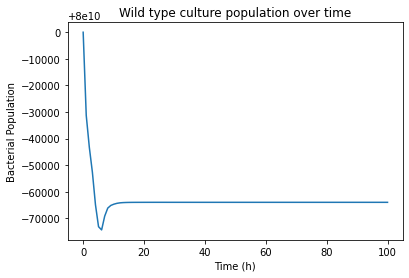

In [62]:

#REDESIGN_THRESHOLD_TERMINAL = 0.75*(rmax-base)+base
REDESIGN_THRESHOLD = 0.50*(rmax-base)+base
redesign_working = True
current_time = 0
terminate = False
#species_matrix = np.zeros((max_nonspecific+1, max_specific+1))
#species_matrix[0][0] = 1

overall_results = []
overall_times = []
for _ in range(100):
  if not redesign_working:
    break
  # Initialize bacterial model with current species number
  model = BacterialModel(species_matrix)

  # Run simulation, other solvers could be TauHybridSolver and NumpySSASolver.
  s_results = model.run(ODESolver()) 

  # Reshape the s_results object into a NumPy array.
  results_matrix = [s_results[title] for title in s_results[0]][1:]
  results_matrix = np.asarray(results_matrix)

  for t in range(results_matrix.shape[1]):
    # Index into results_matrix and get the population matrix at time t
    last_timestep_vector = results_matrix[:, t]
    last_timestep_matrix = np.reshape(last_timestep_vector, (max_nonspecific+1, max_specific+1))

    # Calculate stop conditions
    average_growth_rate = np.sum(last_timestep_matrix * arr)/np.sum(last_timestep_matrix)
    redesign_stop_condition = average_growth_rate > REDESIGN_THRESHOLD
    dilution_stop_condition = np.sum(last_timestep_matrix) > CARRYING_CAPACITY*0.75

    # Update overall matrix and times
    overall_results.append(last_timestep_matrix)
    overall_times.append(current_time+ s_results['time'][t])
          
    if (dilution_stop_condition or redesign_stop_condition):# and not terminate:
      if dilution_stop_condition:
        print('dilution')
        # "Transfer" a portion of the bacteria to a "new flask".
        last_timestep_matrix = 0.01*last_timestep_matrix

      if redesign_stop_condition:
        # Redesign antisense, rendering all specific mutations useless.
        for i in range(max_nonspecific+1):
          last_timestep_matrix[i][0] = np.sum(last_timestep_matrix[i])
          last_timestep_matrix[i][1:] = 0

          # Calculate the new average growth rate; consider treatment a failure.
          new_average_growth_rate = np.sum(last_timestep_matrix * arr)/np.sum(last_timestep_matrix)
          if new_average_growth_rate > REDESIGN_THRESHOLD:#_TERMINAL:
            redesign_working = False
            print('Redesign failure!')
          # elif new_average_growth_rate > 0.9 * REDESIGN_THRESHOLD:
          #   redesign_working = False
          #   terminate = True
          #   print('Redesign failure, waiting until final')
              
          else:
            print('redesign')

          # Update overall matrix and times again, because the overall matrix has 
          # changed due to redesign or transfer
            
          overall_results.append(last_timestep_matrix)
          overall_times.append(current_time + s_results['time'][t])
          current_time += s_results['time'][t]
  break

if not (redesign_stop_condition or dilution_stop_condition):
  print('no dilution or redesign on this step')
  current_time += s_results['time'][-1]

species_matrix = last_timestep_matrix
print(np.round(last_timestep_matrix))


print('Failure time: ' + str(overall_times[-1]) + ' hours')
mutations = [item[0][0] for item in overall_results]
plt.bar3d(overall_times, mutations)
plt.xlabel("Time (h)")
plt.ylabel("Bacterial Population")
plt.title("Wild type culture population over time")



In [ ]:
      #from drawnow import drawnow
      #import seaborn as sns
      #%matplotlib
      #def draw_fig():
      #    plt.title('Timelapse of evolutionary simulation (log scale population)')
      #    sns.heatmap(np.log(result+0.00000001), vmin = 0,vmax=np.log(CARRYING_CAPACITY), cmap='Purples')
      #    plt.ylabel('Number of specific mutations')
      #    plt.xlabel('Number of nonspecific mutations')

          
      #for result in overall_results[::1]:
      #  drawnow(draw_fig)
      #result = overall_results[-1]
      #drawnow(draw_fig)
